# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\illya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("../../resources/api_keys.env")
newsapi_key = os.getenv("NEWSAPI_API_KEY")
print(f"NewsAPI API Key Type : {type(newsapi_key)}")

NewsAPI API Key Type : <class 'str'>


In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=newsapi_key)

In [4]:
# Fetch the Bitcoin news articles 
pages = 5
btc_news = []

# Get 5 pages of articles (100 articles)
for i in list(range(1,pages+1)):
    articles = newsapi.get_everything(q='bitcoin', language='en', page=i)['articles']
    btc_news.append(articles)

btc_corpus = [y for x in btc_news for y in x]

print(f"Total articles about Bitcoin: {len(btc_corpus)}")

Total articles about Bitcoin: 100


In [5]:
# Fetch the Bitcoin news articles 
pages = 5
eth_news = []

# Get 5 pages of articles (100 articles)
for i in list(range(1,pages+1)):
    articles = newsapi.get_everything(q='ethereum', language='en', page=i)['articles']
    eth_news.append(articles)

eth_corpus = [y for x in eth_news for y in x]

print(f"Total articles about Ethereum: {len(eth_corpus)}")

Total articles about Ethereum: 100


In [9]:
# Initialize the VADER sentiment analyzer
btc_analyzer = SentimentIntensityAnalyzer()

# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_corpus:
    try:
        text = article['content']
        date = article['publishedAt']
        
        sentiment = btc_analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sentiment.append({
            'date' : date,
            'text' : text,
            'compound' : compound,
            'positive' : pos,
            'negative' : neg,
            'neutral' : neu
        })
        
    except AttributeError:
        print('error')
    
btc_df = pd.DataFrame(btc_sentiment)
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12T22:17:08Z,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.00,0.718
2,2021-05-12T22:21:15Z,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816
3,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.00,0.957
4,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000


In [10]:
len(btc_df.index)

100

In [11]:
# Initiate VADER sentiment analyzer
eth_analyzer = SentimentIntensityAnalyzer()

# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_corpus:
    try:
        text = article['content']
        date = article['publishedAt']
        
        sentiment = eth_analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neg = sentiment['neg']
        neu = sentiment['neu']
        
        eth_sentiment.append({
            'date' : date,
            'text' : text,
            'compound' : compound,
            'positive' : pos,
            'negative' : neg,
            'neutral' : neu
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiment)
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12T22:46:10Z,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940
1,2021-05-15T01:49:36Z,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894
2,2021-05-19T16:05:22Z,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847
3,2021-05-20T11:02:42Z,,0.0000,0.000,0.000,0.000
4,2021-05-31T12:17:00Z,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000


In [12]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.034275,0.053860,0.043370,0.902810
std,0.407544,0.068269,0.052219,0.079079
min,-0.762700,0.000000,0.000000,0.677000
25%,-0.273200,0.000000,0.000000,0.846750
50%,0.000000,0.040500,0.000000,0.918500
75%,0.350450,0.078000,0.074500,0.958750
max,0.845500,0.282000,0.203000,1.000000


In [13]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.093012,0.060450,0.035720,0.893820
std,0.366192,0.062248,0.055073,0.118783
min,-0.868900,0.000000,0.000000,0.000000
25%,-0.177900,0.000000,0.000000,0.850750
50%,0.000000,0.058500,0.000000,0.920500
75%,0.401900,0.097250,0.069000,0.954000
max,0.778300,0.246000,0.286000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: **BTC has the highest mean + score : 0.09**

Q: Which coin had the highest compound score?

A: **BTC has the highest compound score : 0.25**

Q. Which coin had the highest positive score?

A: **BTC has the highest positive score : 0.28**

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lem_lower = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in lem_lower if word not in sw]
    
    return tokens

In [17]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = [tokenizer(text) for text in btc_df['text']]
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12T22:17:08Z,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-06-09T12:04:40Z,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.00,0.718,"[el, salvadors, president, nayib, bukele, ha, ..."
2,2021-05-12T22:21:15Z,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."
3,2021-06-09T10:00:00Z,El Salvador has become the first country in th...,0.1280,0.043,0.00,0.957,"[el, salvador, ha, become, first, country, wor..."
4,2021-05-19T13:47:36Z,Illustration by Alex Castro / The Verge\r\n\n ...,0.0000,0.000,0.00,1.000,"[illustration, alex, castro, verge, cryptocurr..."


In [18]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(text) for text in eth_df['text']]
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12T22:46:10Z,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.000,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-15T01:49:36Z,Solana isn’t known yet outside of the crypto c...,0.5499,0.106,0.000,0.894,"[solana, isnt, known, yet, outside, crypto, co..."
2,2021-05-19T16:05:22Z,"Bitcoin, Ethereum and a host of Altcoins suffe...",-0.2023,0.066,0.087,0.847,"[bitcoin, ethereum, host, altcoins, suffered, ..."
3,2021-05-20T11:02:42Z,,0.0000,0.000,0.000,0.000,[]
4,2021-05-31T12:17:00Z,A representation of virtual currency Ethereum ...,0.0000,0.000,0.000,1.000,"[representation, virtual, currency, ethereum, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [19]:
from collections import Counter
from nltk import ngrams

In [20]:
# Generate the Bitcoin N-grams where N=2
btc_li = [y for x in btc_df['tokens'] for y in x]

In [22]:
btc_grams = ngrams(btc_li, n=2)

In [23]:
# Generate the Ethereum N-grams where N=2
eth_li = [y for x in eth_df['tokens'] for y in x]

In [24]:
eth_grams = ngrams(eth_li, n=2)

In [25]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N : int=10):
    """Returns the top N tokens from the frequency count"""
    
    top = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(top.items()), columns=['tokens', 'count'])

In [26]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_grams,10)

,tokens,count
0,"(elon, musk)",27
1,"(virtual, currency)",11
2,"(currency, bitcoin)",11
3,"(illustration, taken)",11
4,"(char, bitcoin)",9
5,"(char, reuters)",9
6,"(seen, front)",8
7,"(ceo, elon)",7
8,"(bos, elon)",7
9,"(accepting, bitcoin)",6


In [27]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_grams,10)

,tokens,count
0,"(char, bitcoin)",11
1,"(expressed, entrepreneur)",7
2,"(entrepreneur, contributor)",7
3,"(elon, musk)",7
4,"(virtual, currency)",6
5,"(illustration, taken)",6
6,"(char, opinions)",6
7,"(opinions, expressed)",6
8,"(vitalik, buterin)",5
9,"(bitcoin, ethereum)",5


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

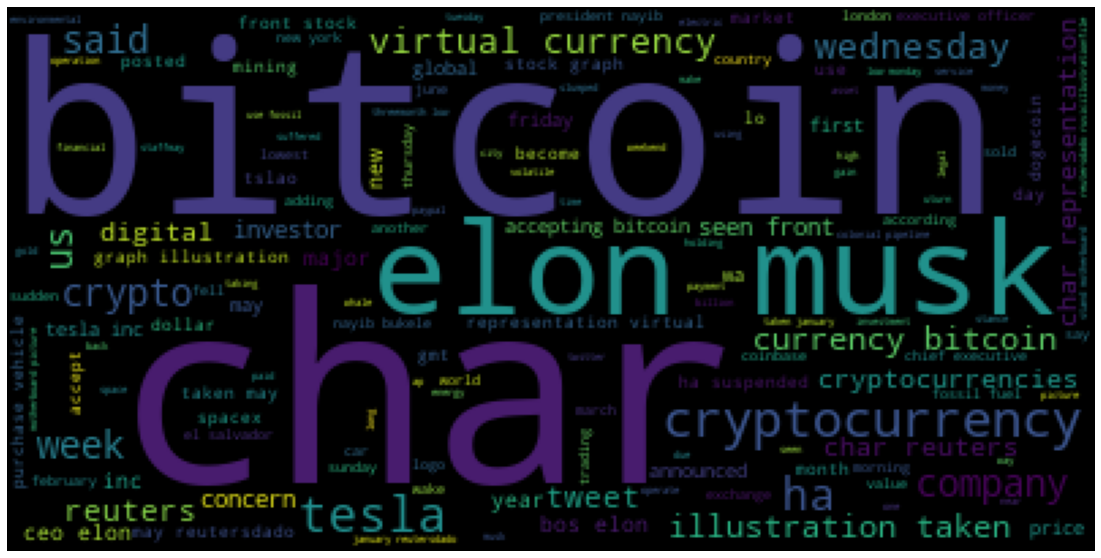

In [43]:
# Generate the Bitcoin word cloud
btc_li_bigstring = ' '.join(btc_li)
btc_wc = WordCloud().generate(btc_li_bigstring)
plt.axis('off')
plt.imshow(btc_wc)

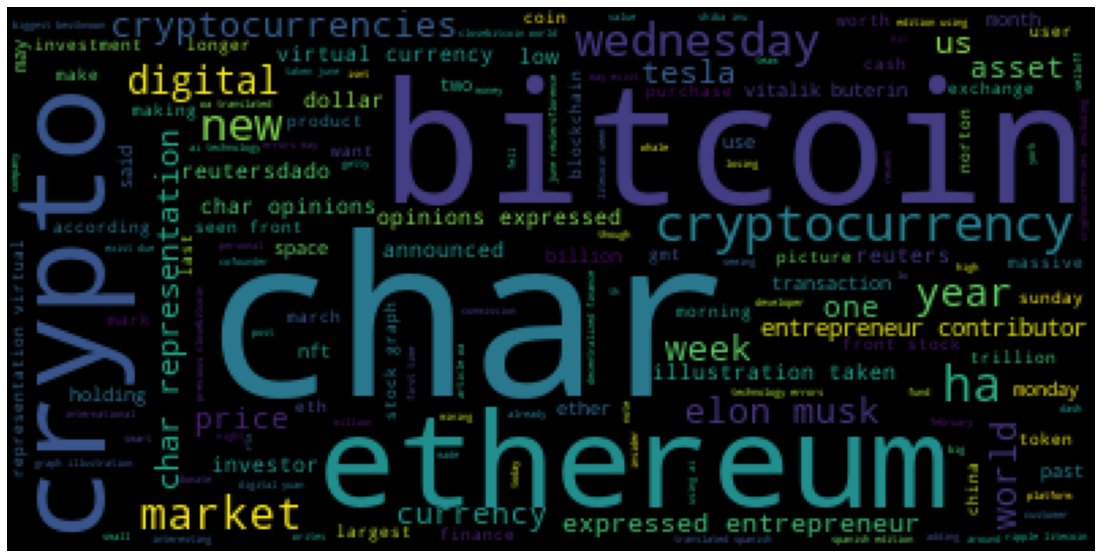

In [44]:
# Generate the Ethereum word cloud
eth_li_bigstring = ' '.join(eth_li)
eth_wc = WordCloud().generate(eth_li_bigstring)
plt.axis('off')
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [ ]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [ ]:
# Render the visualization
# YOUR CODE HERE!

In [ ]:
# List all Entities
# YOUR CODE HERE!

---